In [8]:
# from utils import *
from models import *
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
dec=decoder().to(device)

In [4]:
dec.load_state_dict(torch.load('aae_decoder.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
dec.eval()

decoder(
  (block): Sequential(
    (0): Linear(in_features=8, out_features=1000, bias=True)
    (1): Dropout(p=0.25, inplace=False)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=1000, out_features=1000, bias=True)
    (4): Dropout(p=0.25, inplace=False)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=1000, out_features=784, bias=True)
  )
)

In [28]:
def plot_random():
    """
    Plots a random character from the Normal Distribution N[0,5).
    No arguments
    """
    # dec.eval()
    samp=(torch.randn(1,8)*5).float().to(device)
    plt.imshow(dec(samp).reshape(28,28).squeeze().detach().cpu().numpy())
    plt.show()
    return samp

def plot_losses(recloss,dloss,gloss):
    """
    Function which plots graph of all losses.
    Args:
        recloss (list or iterable type object): Object containing recombination loss for each epoch/iteraction.
        dloss (list or iterable type object): Object containing discriminator loss.
        gloss (list or iterable type object): Object containing generator loss.
    """
    plt.plot(recloss,label='recombination loss')
    plt.plot(dloss,label='discriminator loss')
    plt.plot(gloss,label='gen loss')
    plt.legend()
    return plt.show()

def interpolate_characters(n,s1,s2,filename=None,cmap=None):
    """
    Function which returns a plot of n-linearly interpolated figures between s1 and s2.
    Args:
        n (Integer): Number of plots you want.
        s1 (torch.tensor): Image one.
        s2 (torch.tensor): Image two.
        filename (String): Name of image you want to store the plot as. Defaults to None.
        cmap (String): Custom matplotlib cmap. Defaults to 'Greens'.
    """
    f, axarr = plt.subplots(ncols=n)
    # dec.eval()
    if cmap is not None:
        plt.set_cmap(cmap)
    else:
        plt.set_cmap('Greens')
    plt.axis('off')
    m=(s2-s1)/n
    for i in range(n):
        latz=m*(i+1)+s1
        image=dec(latz).reshape(28,28).detach().cpu().numpy()
        axarr[i].imshow(image)
        axarr[i].axis("off")
    if filename is not None:
        plt.savefig(filename,bbox_inches='tight')
    return plt.show()

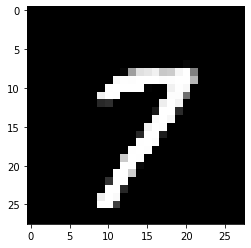

In [136]:
s1=plot_random()

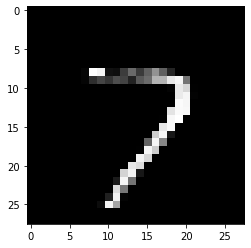

In [190]:
s2=plot_random()

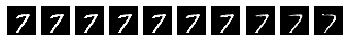

In [192]:
interpolate_characters(10,s1,s2,
                       cmap='binary_r',
                       filename='assets/7-7_stroke.png'
                      )

In [74]:
ls

8-8_stroke.png   aae_decoder.pth  models.py
README.md        assets/          test.ipynb
__pycache__/     main.py          utils.py
